## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).


In [67]:
import torch
torch.cuda.is_available()

True

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [68]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [69]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [70]:
y.backward()

In [71]:
x.grad

tensor([6.])

In [72]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [73]:
# Create two points
x = torch.tensor([0.0, 2.0], requires_grad=True)

# Compute sigmoid: f(x) = 1/(1 + e^(-x))
y = torch.sigmoid(x)

# Known formula for sigmoid derivative: f'(x) = f(x)(1 - f(x))
sigmoid_derivative = y * (1 - y)
print(sigmoid_derivative)

y.sum().backward()
print(x.grad)

tensor([0.2500, 0.1050], grad_fn=<MulBackward0>)
tensor([0.2500, 0.1050])


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [74]:
x = torch.tensor([-1.0, 2.0], requires_grad=True)

# Compute linear function: f(x) = x
y = x

linear_derivative = torch.ones_like(x) # derivative of linear function is 1; for multiple elements, we use ones_like
print(linear_derivative)

y.sum().backward()
print(x.grad)

tensor([1., 1.])
tensor([1., 1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [75]:
x = torch.tensor([-1.0, 2.0], requires_grad=True)

# Compute ReLU function: f(x) = max(0, x)
y = torch.relu(x)

# Known formula for ReLU derivative: f'(x) = 1 if x > 0, 0 if x <= 0
relu_derivative = torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))
print(relu_derivative)

y.sum().backward()
print(x.grad)

tensor([0., 1.])
tensor([0., 1.])


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

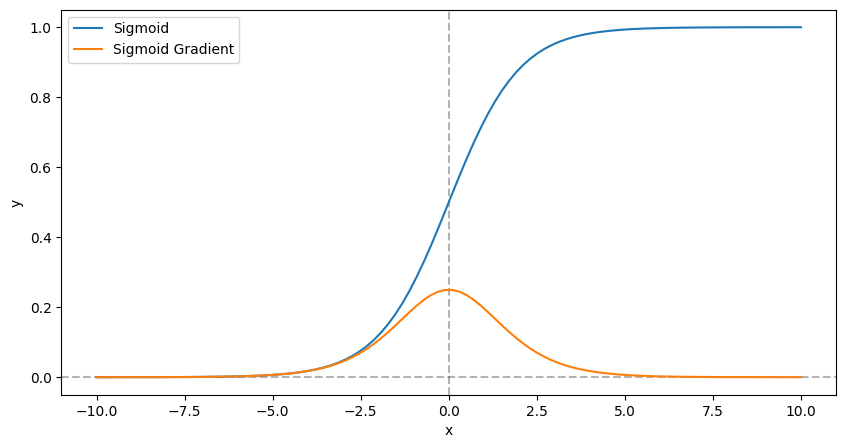

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the sigmoid gradient function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate a range of x values
x = np.linspace(-10, 10, 100)

# Compute the sigmoid and its gradient
y = sigmoid(x)
y_grad = sigmoid_gradient(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid')

# Plot the sigmoid gradient
plt.plot(x, y_grad, label='Sigmoid Gradient')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

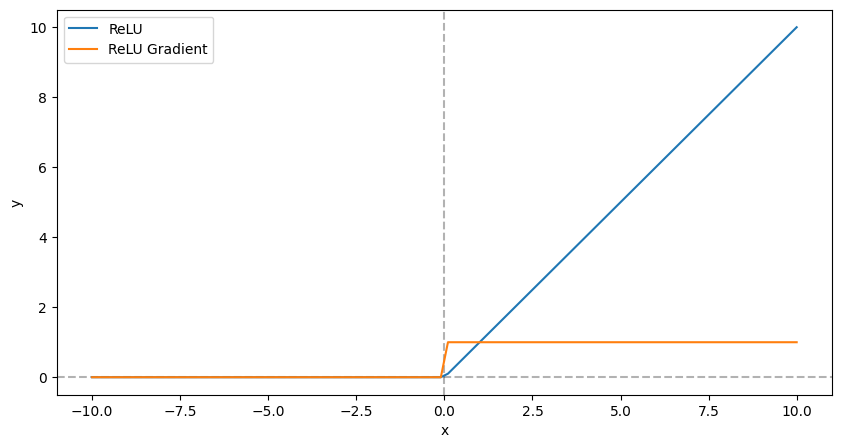

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the ReLU gradient function
def relu_gradient(x):
    return np.where(x > 0, 1, 0)

# Generate a range of x values
x = np.linspace(-10, 10, 100)

# Compute the ReLU and its gradient
y = relu(x)
y_grad = relu_gradient(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)


# Plot the ReLU function
plt.plot(x, y, label='ReLU')

# Plot the ReLU gradient
plt.plot(x, y_grad, label='ReLU Gradient')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

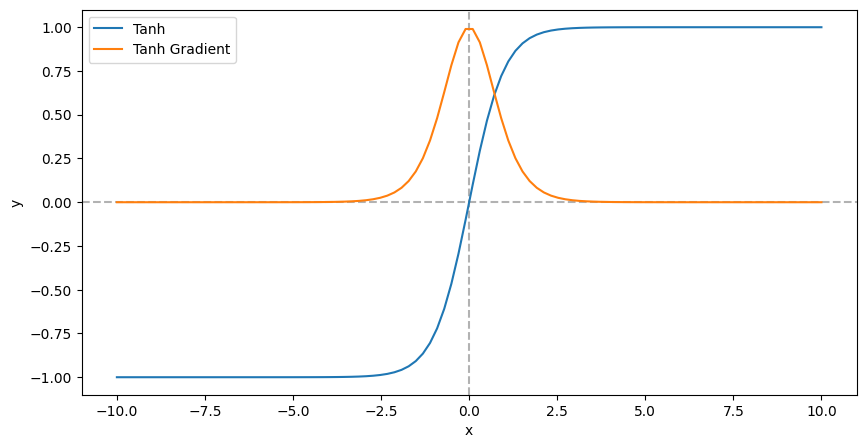

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define the tanh function
def tanh(x):
    return np.tanh(x)

# Define the tanh gradient function
def tanh_gradient(x):
    return 1 - np.tanh(x)**2

# Generate a range of x values
x = np.linspace(-10, 10, 100)

# Compute the tanh and its gradient
y = tanh(x)
y_grad = tanh_gradient(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)


# Plot the tanh function
plt.plot(x, y, label='Tanh')

# Plot the tanh gradient
plt.plot(x, y_grad, label='Tanh Gradient')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

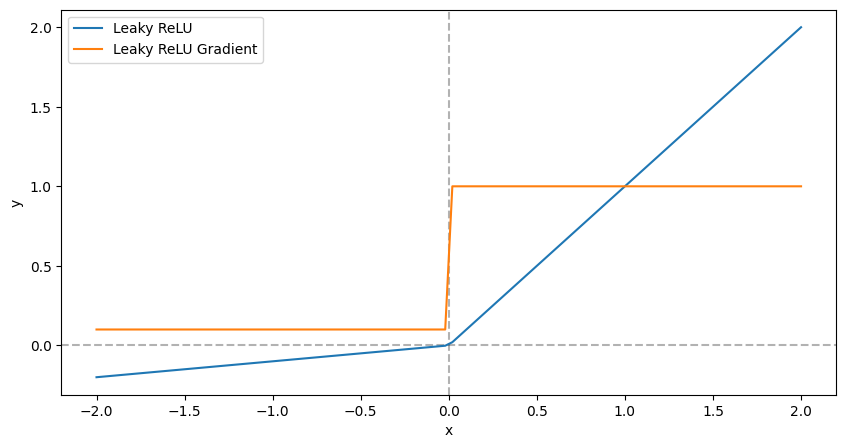

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Define the leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Define the leaky ReLU gradient function
def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)


alpha = 0.1

# Generate a range of x values  
x = np.linspace(-2, 2, 100)

# Compute the leaky ReLU and its gradient
y = leaky_relu(x, alpha)
y_grad = leaky_relu_gradient(x, alpha) 

# Create the plot
plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Plot the leaky ReLU function
plt.plot(x, y, label='Leaky ReLU')  

# Plot the leaky ReLU gradient
plt.plot(x, y_grad, label='Leaky ReLU Gradient')

# Add labels and legend
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [80]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [102]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5861], grad_fn=<SigmoidBackward0>)


In [103]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6295
Epoch [200/1000], Loss: 0.6260
Epoch [300/1000], Loss: 0.6252
Epoch [400/1000], Loss: 0.6251
Epoch [500/1000], Loss: 0.6250
Epoch [600/1000], Loss: 0.6250
Epoch [700/1000], Loss: 0.6250
Epoch [800/1000], Loss: 0.6250
Epoch [900/1000], Loss: 0.6250
Epoch [1000/1000], Loss: 0.6250


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [123]:
import torch
import torch.nn as nn
import torch.optim as optim

input_dim = 2
output_dim = 1

# Define the Perceptron class
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

In [118]:
# OR Gate dataset
or_data = torch.tensor([[0., 0.],
                        [0., 1.],
                        [1., 0.],
                        [1., 1.]], dtype=torch.float32)
or_labels = torch.tensor([[0.],
                         [1.],
                         [1.],
                         [1.]], dtype=torch.float32)

In [119]:
perceptron = Perceptron(input_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

In [125]:
# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(or_data)
    loss = criterion(outputs, or_labels)

    # Backward pass and optimization    
    optimizer.zero_grad() # reset the gradients
    loss.backward() # compute the gradients
    optimizer.step() # update the weights

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the trained model
with torch.no_grad():
    outputs = perceptron(or_data) # compute the outputs
    predicted = (outputs > 0.5).float() # convert the outputs to 0 or 1
    accuracy = (predicted == or_labels).float().mean() # compute the accuracy
    print(f'Accuracy on OR dataset: {accuracy.item():.4f}')

Epoch [100/1000], Loss: 0.0462
Epoch [200/1000], Loss: 0.0441
Epoch [300/1000], Loss: 0.0421
Epoch [400/1000], Loss: 0.0404
Epoch [500/1000], Loss: 0.0387
Epoch [600/1000], Loss: 0.0372
Epoch [700/1000], Loss: 0.0358
Epoch [800/1000], Loss: 0.0345
Epoch [900/1000], Loss: 0.0333
Epoch [1000/1000], Loss: 0.0322
Accuracy on OR dataset: 1.0000


Model 1 (Less Training) Predictions:

Input | Target | Prediction | Rounded
---------------------------------------------
[0. 0.] | 0 | 0.6039 | 1
[0. 1.] | 1 | 0.7561 | 1
[1. 0.] | 1 | 0.8602 | 1
[1. 1.] | 1 | 0.9260 | 1

Model 2 (More Training) Predictions:

Input | Target | Prediction | Rounded
---------------------------------------------
[0. 0.] | 0 | 0.1905 | 0
[0. 1.] | 1 | 0.9272 | 1
[1. 0.] | 1 | 0.9251 | 1
[1. 1.] | 1 | 0.9985 | 1


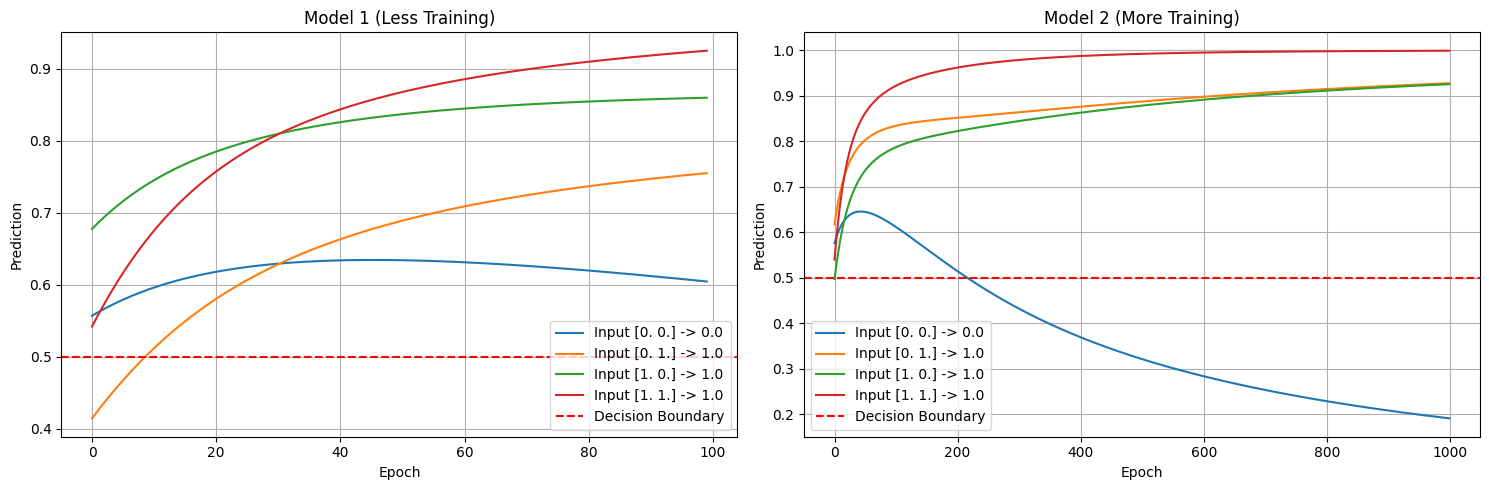

In [126]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create OR gate dataset
X = torch.tensor([[0., 0.],
                 [0., 1.],
                 [1., 0.],
                 [1., 1.]], dtype=torch.float32)
y = torch.tensor([[0.],
                 [1.],
                 [1.],
                 [1.]], dtype=torch.float32)

# Create two models to compare
model1 = Perceptron(input_dim=2, output_dim=1)
model2 = Perceptron(input_dim=2, output_dim=1)

# Train first model for fewer epochs (less confident predictions)
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)
criterion = nn.BCELoss()

predictions_history1 = []
for epoch in range(100):  # Fewer epochs
    outputs = model1(X)
    predictions_history1.append(outputs.detach().numpy())
    loss = criterion(outputs, y)
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()

# Train second model for more epochs (more confident predictions)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
predictions_history2 = []
for epoch in range(1000):  # More epochs
    outputs = model2(X)
    predictions_history2.append(outputs.detach().numpy())
    loss = criterion(outputs, y)
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

# Compare results
print("Model 1 (Less Training) Predictions:")
with torch.no_grad():
    outputs1 = model1(X)
    print("\nInput | Target | Prediction | Rounded")
    print("-" * 45)
    for i in range(len(X)):
        print(f"{X[i].numpy()} | {y[i].item():.0f} | {outputs1[i].item():.4f} | {(outputs1[i].item() > 0.5):.0f}")

print("\nModel 2 (More Training) Predictions:")
with torch.no_grad():
    outputs2 = model2(X)
    print("\nInput | Target | Prediction | Rounded")
    print("-" * 45)
    for i in range(len(X)):
        print(f"{X[i].numpy()} | {y[i].item():.0f} | {outputs2[i].item():.4f} | {(outputs2[i].item() > 0.5):.0f}")

# Visualize how predictions evolve during training
plt.figure(figsize=(15, 5))

# Plot Model 1 predictions
plt.subplot(1, 2, 1)
predictions_history1 = np.array(predictions_history1)
for i in range(len(X)):
    plt.plot(predictions_history1[:, i], 
             label=f'Input {X[i].numpy()} -> {y[i].item()}')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary')
plt.title('Model 1 (Less Training)')
plt.xlabel('Epoch')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)

# Plot Model 2 predictions
plt.subplot(1, 2, 2)
predictions_history2 = np.array(predictions_history2)
for i in range(len(X)):
    plt.plot(predictions_history2[:, i], 
             label=f'Input {X[i].numpy()} -> {y[i].item()}')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary')
plt.title('Model 2 (More Training)')
plt.xlabel('Epoch')
plt.ylabel('Prediction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()